#Data 620-Project01

Group members: Mahmud Hasan Al Raji and Warner Alexis.

This project is a group effort. The project is designed based on three requirements, which are outlined in the three parts below

#Part-1. Identifying a dataset with network structure and at least one categorical variable
We have selected the Deezer Europe Social Network dataset for this assignment. The dataset was collected from the public API in March 2020. It is now available as a CSV file on Stanford University's dataset collection site (SNAP, link: https://snap.stanford.edu/data/feather-deezer-social.html), from where we obtained it. The dataset has 28,281 nodes and 92,752 edges. Nodes represent users from European countries, and edges represent mutual follower relationships.The user (i.e. gender) is a categorical variable and in the target file, 0 represents Male and 1 represents Female. This dataset is suitable because it provides both the network structure and categorical variables for nodes, which are required for the assignment.

The dataset is a large, sparse network with a density of only 0.00023. On average, each user maintains about 6.56 connections, and the clustering coeffcient of 0.0959 indicates a modest tendency toward small friendship circles where friends of friends are also connected. This dataset, with its binary gender labels, oﬀers a valuable opportunity to explore centrality measures across categories, assess homophily, and compare how structural importance diﬀers between groups.

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind

#Load the edges file and create a network graph.
edges = pd.read_csv("https://raw.githubusercontent.com/Raji030/data620_assignment03_deezer_edges/refs/heads/main/deezer_europe_edges.csv")
G = nx.from_pandas_edgelist(edges, source="node_1", target="node_2")


In [2]:
#Load node attributes and assign gender to nodes.
node_attr = pd.read_csv("https://raw.githubusercontent.com/Raji030/data620_assignment03_deezer_target/refs/heads/main/deezer_europe_target.csv")
gender_dict = node_attr.set_index("id")["target"].map({0: "Male", 1: "Female"}).to_dict()
nx.set_node_attributes(G, gender_dict, "gender")

#Create dataframe with Node and gender attribute
nodes_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Gender': [G.nodes[n].get('gender', None) for n in G.nodes()]
})

#See first 10 nodes
print(nodes_df.head(10))


    Node  Gender
0      0    Male
1  14270    Male
2  16976    Male
3  12029  Female
4   3001    Male
5  14581    Male
6  14145    Male
7  25564    Male
8      1    Male
9  26065    Male


In [3]:
#Basic Statistics
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
total_male = (nodes_df['Gender'] == 'Male').sum()
total_female = (nodes_df['Gender'] == 'Female').sum()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / n_nodes
transitivity = nx.transitivity(G)

print(f'Number of nodes :{n_nodes}')
print(f'Number of edges; {n_edges}')
print(f"Number of Male nodes: {total_male}")
print(f"Number of Female nodes: {total_female}")
print(f'The density is : {density}')
print(f'The Average degree {avg_degree}')
print(f'The transitivity: {transitivity}')

Number of nodes :28281
Number of edges; 92752
Number of Male nodes: 15743
Number of Female nodes: 12538
The density is : 0.00023194184729358083
The Average degree 6.559315441462466
The transitivity: 0.09592226364671026


In [4]:
#Extract largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc_nodes).copy()
lcc_size = len(largest_cc_nodes)
print(f'largest connected component:{lcc_size}')

largest connected component:28281


The largest connected component (LCC) has 28,821 nodes, which is the same as the total number of nodes in the network. This means all nodes are connected. Since the number of nodes and the LCC are equal, we will use the entire dataset for the analysis.

#Part-2.Calculation of degree centrality and eigenvector centrality

In [5]:
##Calculate centrality measures.

degree_centrality = nx.degree_centrality(G)
#betweenness_centrality = nx.betweenness_centrality(G)
#closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=5000,tol=1e-06)


In [10]:
## Find top 10 degree centralities with nodes and their respective genders
# Create dataframe from degree centrality dictionary

df_deg = pd.DataFrame({
    'Node': list(G.nodes()),
    'Gender': [G.nodes[n].get('gender', None) for n in G.nodes()],
    'Degree_Centrality': [degree_centrality[n] for n in G.nodes()],
    'Number_of_Connections': [G.degree(n) for n in G.nodes()]
})

# Top 10 nodes descending order-এ
top10_deg_node = df_deg.sort_values(by='Degree_Centrality', ascending=False).head(10)

# Show top 10 degree centralities and their nodes
print("Top 10 Nodes by Degree Centrality with their number of connections:")
print(top10_deg_node)

Top 10 Nodes by Degree Centrality with their number of connections:
       Node  Gender  Degree_Centrality  Number_of_Connections
508     867  Female           0.006082                    172
2284    396    Male           0.005375                    152
509    1878    Male           0.005127                    145
995   24904    Male           0.004137                    117
1263   5989    Male           0.003960                    112
844   24069    Male           0.003890                    110
737   17963    Male           0.003395                     96
4322  23143    Male           0.003324                     94
772   11080    Male           0.003289                     93
7026  21798  Female           0.003253                     92


In [37]:
## Find top 10 eigenvector centralities with nodes and their respective genders

# Create dataframe
#df_eig = pd.DataFrame(eigenvector_centrality.items(), columns=['Node', 'Eigenvector_Centrality'])
df_eig = pd.DataFrame({
    'Node': list(G.nodes()),
    'Gender': [G.nodes[n].get('gender', None) for n in G.nodes()],
    'Eigenvector_Centrality': [eigenvector_centrality[n] for n in G.nodes()],
    'Number_of_Connections': [G.degree(n) for n in G.nodes()]
})
# Top 10 nodes in descending order
top10_eig = df_eig.sort_values(by='Eigenvector_Centrality', ascending=False).head(10)

# Show top 10 eigenvector centralities and their nodes
print("\nTop 10 Nodes by Eigenvector Centrality with their number of connections:")
print(top10_eig)



Top 10 Nodes by Eigenvector Centrality with their number of connections:
       Node  Gender  Eigenvector_Centrality  Number_of_Connections
1358  23932  Female                0.209643                     81
342   18679    Male                0.182448                     67
338   27821    Male                0.180671                     66
9480  26413  Female                0.166636                     46
341   19712    Male                0.165662                     59
339    5327    Male                0.164727                     46
3434  18533    Male                0.160207                     49
112   24122  Female                0.159951                     77
745   14010    Male                0.151124                     51
3419  19086    Male                0.150817                     48


Based on the results, Node 23932 (Female) is the most influential node in the network. She has the highest eigenvector centrality (0.2096), meaning she is connected to other highly connected and important nodes. Node 867 (Female) has the highest number of direct connections (172), but her influence depends mainly on direct links. Among male nodes, Node 18679 has the highest eigenvector centrality (0.1824) and several connections (67), showing that males also hold strong positions. Node 396 (Male) has the highest number of direct connections (152) among males, highlighting strong male connectivity in the network. Overall, female nodes tend to occupy the most central positions in this network, both in terms of connectivity and influence.

#Part-3.Comparison of centrality measures across categorical groups.

In [38]:
##Compare mean degree centrality across gender groups.

male_nodes = [n for n, attr in G.nodes(data=True) if attr['gender'] == 'Male']
female_nodes = [n for n, attr in G.nodes(data=True) if attr['gender'] == 'Female']

mean_male_degree = sum([degree_centrality[n] for n in male_nodes]) / len(male_nodes)
mean_female_degree = sum([degree_centrality[n] for n in female_nodes]) / len(female_nodes)

print("Mean Degree Centrality (Male):", mean_male_degree)
print("Mean Degree Centrality (Female):", mean_female_degree)


Mean Degree Centrality (Male): 0.00023811575266473027
Mean Degree Centrality (Female): 0.00022418975028783782


In [39]:
##Compare mean eigenvector cetrality across gender groups.

mean_male_eigen = sum([eigenvector_centrality[n] for n in male_nodes]) / len(male_nodes)
mean_female_eigen = sum([eigenvector_centrality[n] for n in female_nodes]) / len(female_nodes)

print("Mean Eigenvector Centrality (Male):", mean_male_eigen)
print("Mean Eigenvector Centrality (Female):", mean_female_eigen)

Mean Eigenvector Centrality (Male): 0.0009420307713022491
Mean Eigenvector Centrality (Female): 0.0007680886731151735


In [40]:
##Compare average degree or average number of connections and relative eigenvector centrality across gender groups

# Get number of nodes
N = G.number_of_nodes()

# Convert degree centrality to average degree
# (Multiply by N-1, since degree centrality = degree / (N-1))
avg_degree_male = np.mean([degree_centrality[n] * (N - 1) for n, d in G.nodes(data=True) if d.get("gender") == "Male"])
avg_degree_female = np.mean([degree_centrality[n] * (N - 1) for n, d in G.nodes(data=True) if d.get("gender") == "Female"])

# Rescale eigenvector centrality to max = 1
max_eig = max(eigenvector_centrality.values())
rel_eig_male = np.mean([eigenvector_centrality[n] / max_eig for n, d in G.nodes(data=True) if d.get("gender") == "Male"])
rel_eig_female = np.mean([eigenvector_centrality[n] / max_eig for n, d in G.nodes(data=True) if d.get("gender") == "Female"])

# See results
print("Average Degree/average number of connections (Male):", avg_degree_male)
print("Average Degree/average number of connections (Female):", avg_degree_female)
print("Relative Eigenvector Centrality (Male):", rel_eig_male)
print("Relative Eigenvector Centrality (Female):", rel_eig_female)

Average Degree/average number of connections (Male): 6.733913485358572
Average Degree/average number of connections (Female): 6.340086138140054
Relative Eigenvector Centrality (Male): 0.004493505964446724
Relative Eigenvector Centrality (Female): 0.003663798613601362


The Mean Eigenvector Centrality for male nodes is 0.000942 (0.094%) and for female nodes is 0.000768 (0.077%), showing the average absolute influence within the network. In terms of Relative Eigenvector Centrality, male nodes score 0.00449 (0.449%) while female nodes score 0.00366 (0.366%), indicating that male nodes hold slightly higher influence relative to the most influential node in the network. The relative measure is more informative for understanding network importance, while the mean provides the absolute average value

#Get some visualizations

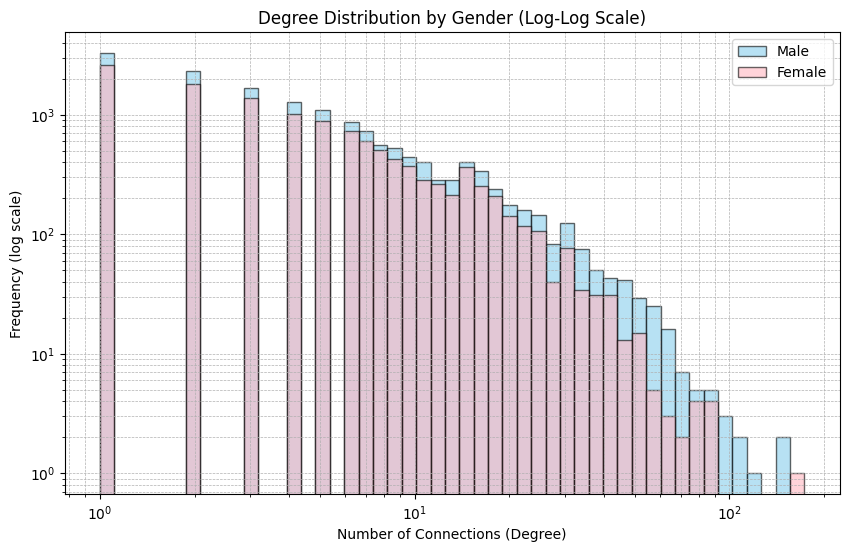

In [30]:
# Separate degrees by gender
male_degrees = df_deg[df_deg['Gender']=='Male']['Number_of_Connections']
female_degrees = df_deg[df_deg['Gender']=='Female']['Number_of_Connections']

# Set ithmic bins
bins = np.logspace(0, np.log10(df_deg['Number_of_Connections'].max()+1), 50)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(male_degrees, bins=bins, alpha=0.6, label='Male', color='skyblue', edgecolor='black')
plt.hist(female_degrees, bins=bins, alpha=0.6, label='Female', color='lightpink', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Connections (Degree)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution by Gender (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


/tmp/ipython-input-4038732622.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Degree_Centrality', data=df_deg, palette=['blue','red'])


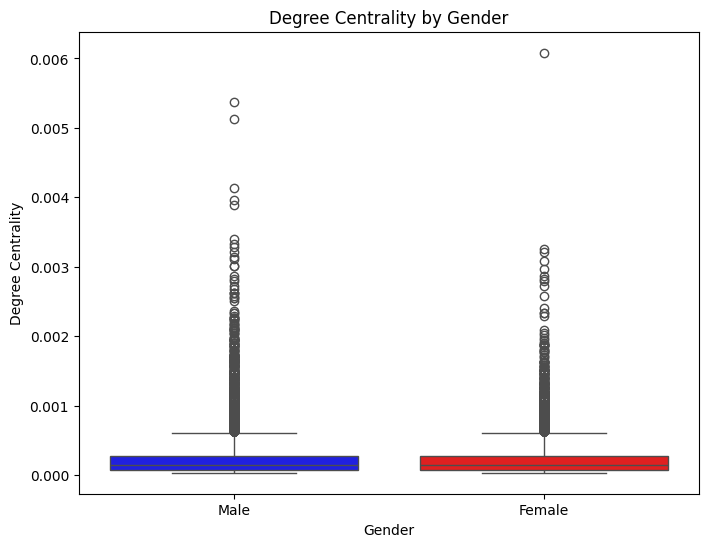

In [61]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Degree_Centrality', data=df_deg, palette=['blue','red'])
plt.title('Degree Centrality by Gender')
plt.ylabel('Degree Centrality')
plt.xlabel('Gender')
plt.show()


/tmp/ipython-input-1667574227.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue','red'])


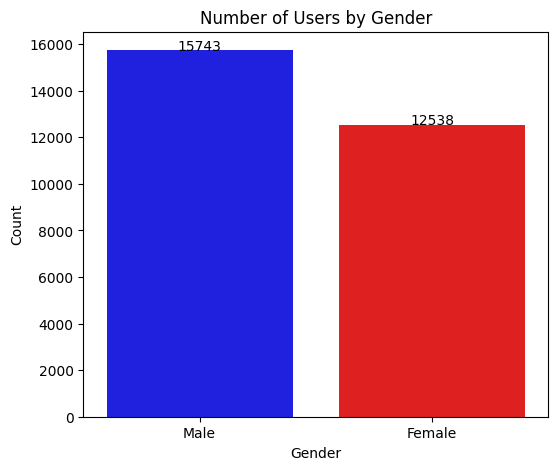

In [62]:

# Count of users by gender
gender_counts = df_deg['Gender'].value_counts()

plt.figure(figsize=(6,5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=['blue','red'])

# Add value labels on top of bars
for i, count in enumerate(gender_counts.values):
    plt.text(i, count + 5, str(count), ha='center', fontsize=10)

plt.title('Number of Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


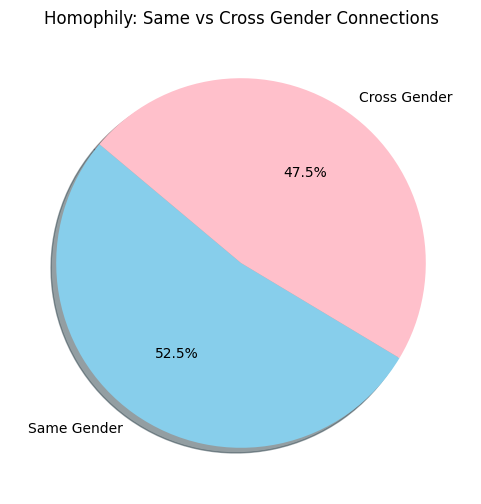

In [65]:

# Count edges by gender pairing
same_gender = 0
cross_gender = 0

for u, v in G.edges():
    gender_u = G.nodes[u]['gender']
    gender_v = G.nodes[v]['gender']
    if gender_u == gender_v:
        same_gender += 1
    else:
        cross_gender += 1

# Set data for pie chart
labels = ['Same Gender', 'Cross Gender']
sizes = [same_gender, cross_gender]
colors = ['skyblue', 'pink']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Homophily: Same vs Cross Gender Connections')
plt.show()


In [12]:
def scatter_degree_vs_eigenvector(df, attr_name, annotate_top_k=10, figsize=(7, 6)):
    """Scatter of eigenvector vs degree centrality; optionally annotate top_k by eigenvector."""
    plt.figure(figsize=figsize)
    x = df["degree_centrality"]
    y = df["eigenvector_centrality"]
    plt.scatter(x, y, s=10, alpha=0.6)
    plt.xlabel("Degree Centrality")
    plt.ylabel("Eigenvector Centrality")
    plt.title("Eigenvector vs Degree Centrality (all nodes)")
    if annotate_top_k and annotate_top_k > 0:
        top_nodes = df.nlargest(annotate_top_k, "eigenvector_centrality")
        for _, r in top_nodes.iterrows():
            plt.annotate(str(r["node"]), (r["degree_centrality"], r["eigenvector_centrality"]), fontsize=8)
    plt.tight_layout()


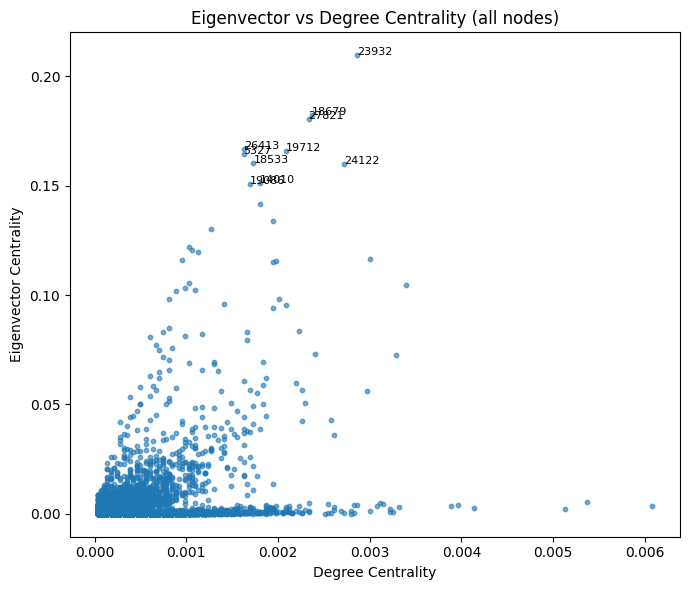

In [13]:
#from centrality_by_group_helpers import (
   # build_centrality_df, summary_by_group,
   # boxplot_by_group, bar_means_by_group, scatter_degree_vs_eigenvector
#)

# 1) Build a tidy table with both centralities + your category
#    Replace G with your graph variable, and 'gender' with your node attribute
df_cent = build_centrality_df(G, attr_name='gender')


# 5) Relationship between the two metrics + annotate top nodes
scatter_degree_vs_eigenvector(df_cent, 'gender', annotate_top_k=10)


The scatterplot of eigenvector centrality versus degree centrality shows a generally positive relationship, where users with more direct connections also tend to be more globally influential in the network. Most nodes cluster near the origin with low values for both measures, reflecting the sparse structure of the Deezer graph. However, several outliers stand out with disproportionately high eigenvector centrality, even though their degree centrality is only moderate. This indicates that their influence comes not from having the largest number of connections, but from being connected to other highly connected and influential users. The annotated nodes represent the most central users by eigenvector score, highlighting how structural position, rather than raw connectivity, can drive global importance in the network.

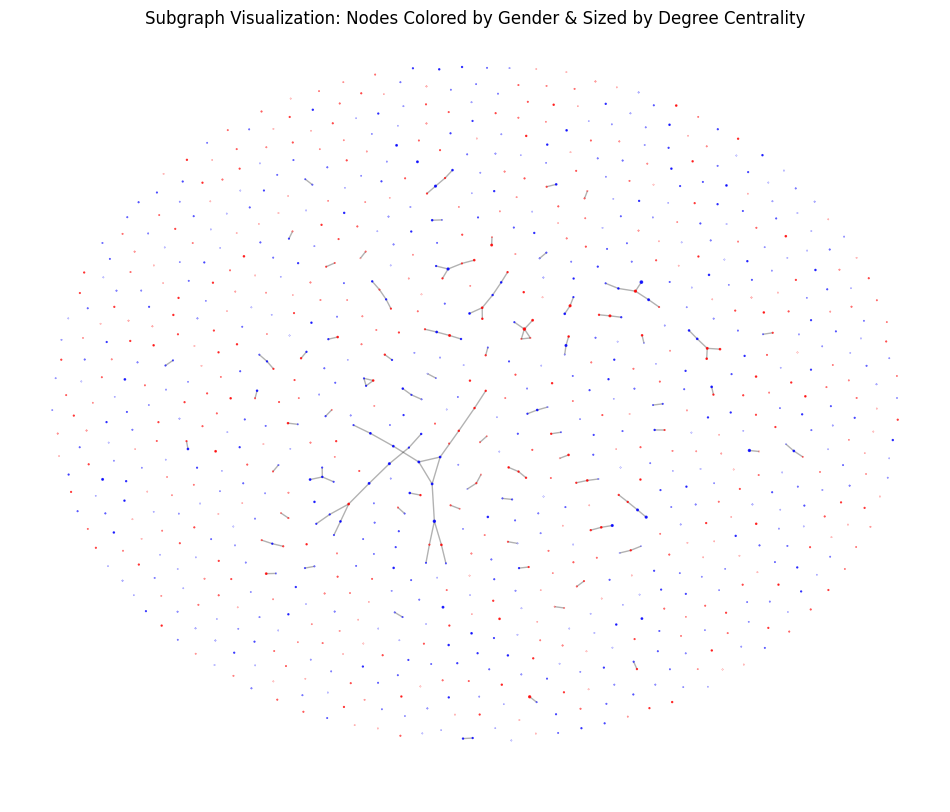

In [60]:
# Sample a subgraph with 1000 nodes
sample_nodes = random.sample(list(G.nodes()),1000)
H = G.subgraph(sample_nodes)

# Set node colors and sizes
node_colors = ['blue' if H.nodes[n]['gender']=='Male' else 'red' for n in H.nodes()]
node_sizes = [df_deg.loc[df_deg['Node']==n, 'Degree_Centrality'].values[0]*1000 for n in H.nodes()]

# Compute layout
pos = nx.spring_layout(H, seed=42)  # Force-directed layout

# Draw subgraph
plt.figure(figsize=(12,10))
nx.draw_networkx_nodes(H, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(H, pos, alpha=0.3)
plt.title('Subgraph Visualization: Nodes Colored by Gender & Sized by Degree Centrality')
plt.axis('off')
plt.show()


Several visualizations are created to better understand the network structure. The histogram of degree distribution is plotted on a log-log scale. It shows how connections vary, highlighting the presence of highly connected hubs. The boxplot of degree centrality by gender compares male and female connectivity, while the bar chart of class distribution displays the proportion of users in each gender category. The pie chart of homophily shows that 52.5% of connections occur within the same gender, while 47.5% are cross-gender, suggesting a slight preference for same-gender ties. Finally, The subgraph of 1,000 nodes shows red mixed-color groups, reflecting both gender-specific connections and areas of cross-gender connectivity.

In [41]:
##Gender-based comparison of network centrality measures including number of connections using t-test

# Degree centrality
male_deg = df_deg[df_deg['Gender'] == 'Male']['Degree_Centrality']
female_deg = df_deg[df_deg['Gender'] == 'Female']['Degree_Centrality']
mean_male_deg = male_deg.mean()
mean_female_deg = female_deg.mean()
perc_diff_deg = ((mean_male_deg - mean_female_deg) / mean_female_deg) * 100
t_stat_deg, p_val_deg = ttest_ind(male_deg, female_deg, equal_var=False)

# Eigenvector centrality
male_eig = df_eig[df_eig['Gender'] == 'Male']['Eigenvector_Centrality']
female_eig = df_eig[df_eig['Gender'] == 'Female']['Eigenvector_Centrality']
mean_male_eig = male_eig.mean()
mean_female_eig = female_eig.mean()
perc_diff_eig = ((mean_male_eig - mean_female_eig) / mean_female_eig) * 100
t_stat_eig, p_val_eig = ttest_ind(male_eig, female_eig, equal_var=False)

# Number of connections
male_conn = df_deg[df_deg['Gender'] == 'Male']['Number_of_Connections']
female_conn = df_deg[df_deg['Gender'] == 'Female']['Number_of_Connections']
mean_male_conn = male_conn.mean()
mean_female_conn = female_conn.mean()
perc_diff_conn = ((mean_male_conn - mean_female_conn) / mean_female_conn) * 100
t_stat_conn, p_val_conn = ttest_ind(male_conn, female_conn, equal_var=False)

# Create a summary table
summary = pd.DataFrame({
    'Centrality_Measure': ['Degree Centrality', 'Eigenvector Centrality', 'Number of Connections'],
    'Mean_Male': [mean_male_deg, mean_male_eig, mean_male_conn],
    'Mean_Female': [mean_female_deg, mean_female_eig, mean_female_conn],
    'Percentage_Difference': [perc_diff_deg, perc_diff_eig, perc_diff_conn],
    't_statistic': [t_stat_deg, t_stat_eig, t_stat_conn],
    'p_value': [p_val_deg, p_val_eig, p_val_conn]
})

print("Centrality comparison for male and female including number of connections:")
print(summary)


Centrality comparison for male and female including number of connections:
       Centrality_Measure  Mean_Male  Mean_Female  Percentage_Difference  \
0       Degree Centrality   0.000238     0.000224               6.211703   
1  Eigenvector Centrality   0.000942     0.000768              22.646096   
2   Number of Connections   6.733913     6.340086               6.211703   

   t_statistic   p_value  
0     4.214988  0.000025  
1     2.510192  0.012072  
2     4.214988  0.000025  


The t-test shows small but clear differences between male and female nodes.
For Degree Centrality, males have a mean of 0.000238 and females 0.000224.
The difference is 6.2% and the p-value is 0.000025. This means the result is significant. For Eigenvector Centrality, males have 0.000942 and females 0.000768. The difference is 22.6% and the p-value is 0.012. This is also significant. For Number of Connections, males have 6.73 and females 6.34 on average. The difference is 6.2% and the p-value is 0.000025. This confirms significance.Overall, males show slightly higher centrality and more connections than females in this network.

**Conclusion**: 


The Deezer Europe social network dataset provides both structure and categorical attributes, making it suitable for centrality analysis. Our results show that males and females have nearly identical degree centrality, indicating similar levels of direct connectivity. However, eigenvector centrality reveals a statistically significant difference, with males more often connected to influential users, giving them slightly greater global importance. Homophily analysis further indicates a modest tendency for users to connect with same-gender peers, though cross-gender ties remain common. Overall, gender plays only a minor role in shaping connectivity in this network.

In [16]:
!jupyter nbconvert --to pdf Data620_Project01_GroupEffort1.ipynb

[NbConvertApp] Converting notebook Data620_Project01_GroupEffort1.ipynb to pdf
[NbConvertApp] Support files will be in Data620_Project01_GroupEffort1_files\
[NbConvertApp] Making directory .\Data620_Project01_GroupEffort1_files
[NbConvertApp] Writing 69046 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 276532 bytes to Data620_Project01_GroupEffort1.pdf
